In [1]:
# Importing the dataset

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('SMSSpamCollection',sep='\t',
                names=['label','message'])

In [4]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.shape

(5572, 2)

In [7]:
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

E:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


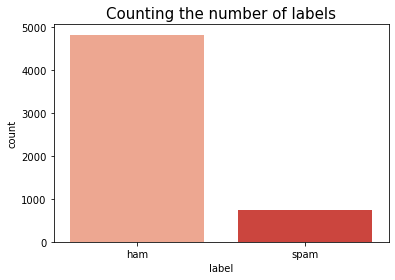

ham     4825
spam     747
Name: label, dtype: int64


In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data['label'],palette= 'Reds')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

print(data.label.value_counts())

In [10]:
# Data cleaning and preprocessing

In [11]:
import re
import nltk

In [12]:
# removing stopwords and implementing stemming to get only useful data

In [13]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [14]:
corpus=[]
for i in range(0,len(data)):
    review=re.sub('[^a-zA-Z]',' ',data['message'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=' '.join(review)
    corpus.append(review)

In [15]:
# Now converting all the sentences into vectors through Countvectorizer and seperating the independent and dependent variable

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()

In [17]:
y=pd.get_dummies(data['label'])
y=y.iloc[:,1].values

In [18]:
# spliting the data into tain and test

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [20]:
# using Naive Bayes algorithm to train the data

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
spam_detection=nb.fit(X_train,y_train)

In [22]:
y_pred=spam_detection.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [24]:
cm

array([[946,   9],
       [  8, 152]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [26]:
accuracy

0.9847533632286996

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.95      0.95       160

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115



In [28]:
 # data visualization through heatmap

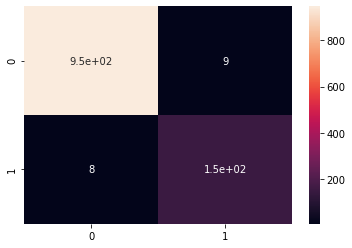

In [29]:
sns.heatmap(cm,annot=True)
plt.show()